# Tutorial of implementing BERT using Huggingface Transformers
This tutorial introduces how to implement the state-of-art NLP language model, BERT, using the Huggingface Transformer library. This tutorial will walk you through the introduction of BERT, overview of some NLP tasks, specifically GLUE dataset that is used for sentence understanding, followed by the introduction of 🤗Transformer, code examples of training BERT with GLUE dataset built in Tensorflow, and using the pre-trained BERT model to predict some new instances.


---

# BERT Introduction
BERT (Bidirectional Encoder Representations from Transformers) is a state-of-art language model for NLP. [BERT](https://github.com/google-research/bert) released with the paper BERT: [Pre-training of Deep Bidirectional Transformers for Language Understanding](https://arxiv.org/abs/1810.04805) by Jacob Devlin, Ming-Wei Chang, Kenton Lee and Kristina Toutanova. Followed by this recent paper published by researchers at Google AI Language (October 2018), it has caused a stir in the Machine Learning and NLP community by presenting the state-of-art results in eleven most popular NLP tasks, including pushing the [GLUE](https://gluebenchmark.com/) score to 80.5% (7.7% point absolute improvement), [MultiNLI](https://www.nyu.edu/projects/bowman/multinli/) accuracy to 86.7% (4.6% absolute improvement), [Stanford's Question Answering Dataset](https://rajpurkar.github.io/SQuAD-explorer/) SQuAD v1.1  Test F1 to 93.2 (1.5 point absolute im- provement) and SQuAD v2.0 Test F1 to 83.1 (5.1 point absolute improvement).

The key innovation of BERT is its bidirectional training of Transformer, a popular attention model, to language modelling. As the paper concluded:
>BERT is designed to pre- train deep bidirectional representations from unlabeled text by jointly conditioning on both left and right context in all layers. As a result, the pre-trained BERT model can be fine- tuned with just one additional output layer to create state-of-the-art models for a wide range of tasks, such as question answering and language inference, without substantial task-specific architecture modifications.

The groundbreaking technology of BERT is its ability to do bidirectional fine-tuning approaches for pre-trained representations. The standard language models today are unidirectional, either left-to-right (like OpenAI GPT) or right-to-left. BERT uses the technology called "Masked Language Model" (MLM), which wil be briefed in the following section, to give more context about BERT.


## Masked Language Model (MLM)

Masked Language Model (MLM)'s pre-training objective is inspired by the Cloze task (Taylor, 1953). 
```The masked language model randomly masks some of the tokens from the input, and the objective is to predict the original vocabulary id of the masked word based only on its context```. Unlike left-to- right language model pre-training, the MLM ob- jective enables the representation to fuse the left and the right context, which allows BERT to pretrain a deep bidirectional Transformer. In addition to the masked language model, BERT also use a “next sentence prediction” task that jointly pre- trains text-pair representations (Google, 2018).

## BERT Implementation
BERT’s model architecture is a multi-layer bidirectional Transformer encoder based on the original implementation de- scribed in Vaswani et al. (2017) and released in the ```tensor2tensor``` library. 
There are two steps to implement BERT, pre-training and fine-tuning.

### Pre-training
1. A [CLS] token is inserted at the beginning of the first sentence and a [SEP] token is inserted at the end of each sentence.    
2. A sentence embedding indicating Sentence A or Sentence B is added to each token. Sentence embeddings are similar in concept to token embeddings with a vocabulary of 2.    
3. A positional embedding is added to each token to indicate its position in the sequence. The concept and implementation of positional embedding are presented in the Transformer paper.

![BERT input](input.png)
*BERT input representation. The input embeddings are the sum of the token embeddings, the segmenta- tion embeddings and the position embeddings (Google, 2018)*

### Fine-tuning
Fine-tuning is straightforward since the self-attention mechanism in the Transformer allows BERT to model many downstream tasks whether they involve single text or text pairs by swapping out the appropriate inputs and outputs. BERT uses the self-attention mechanism to unify these two stages, as encoding a concatenated text pair with self-attention effectively includes bidirectional cross attention between two sentences.

For each task, simply plug in the task-specific inputs and outputs into BERT and fine-tune all the parameters end-to-end. At the input, sentence A and sentence B from pre-training are analogous to 
1. sentence pairs in paraphrasing    
2. hypothesis-premise pairs in entailment    
3. question-passage pairs in question answering    
4. a degenerate text-∅ pair in text classification or sequence tagging   

At the output, the token rep- resentations are fed into an output layer for token level tasks, such as sequence tagging or question answering, and the \[CLS\] representation is fed into an output layer for classification, such as entailment or sentiment analysis.

---

# Huggingface Transformers
[Huggingface Transformers](https://github.com/huggingface/transformers) (formerly known as pytorch-transformers / pytorch-pretrained-bert) is a state-of-the-art Natural Language Processing for TensorFlow 2.0 and PyTorch. It is a mighty transformer that not only provides NLP architectures like BERT, but also some other models like XLM, DistillBert, XLNet, CTRL, and many more with over 32+ pretrained models in 100+ languages. To use Huggingface Transformers, you must have the Tensorflow 2.0 and PyTorch set up because it has deep interoperability between them.

---


# Set up
If you haven't set up Tensorflow and/or Pytorch, refer to the [Tensorflow Install Instruction Page](https://www.tensorflow.org/install/pip#tensorflow-2.0-rc-is-available) and [Pytorch Install Instruction Page](https://pytorch.org/get-started/locally/#start-locally) to install them. Or follow the below instruction on installing them. 

Before installing Tensorflow, make sure the pip and python version are   
**Python > 3.4 and pip >= 19.0**

    $ python3 --version    
$ pip3 --version 
    (or $ pip --version)
    
    
Install Tensorflow 2.0:

    $ pip install --upgrade tensorflow
    
Verify the install:

    $ python -c "import tensorflow as tf;print(tf.reduce_sum(tf.random.normal([1000, 1000])))"
    
To install Pytorch, run the command on the [Pytorch Install Instruction Page](https://pytorch.org/get-started/locally/#start-locally), under the "Start Locally" section and find the section "Run this Command:", based on the environment of your computer. To verify the successful installation of Pytorch, run the following python code:

```python
>>> import torch
>>> x = torch.rand(5, 3)
>>> print(x)
```

Result should be something similar to 
```
tensor([[0.3380, 0.3845, 0.3217],  
        [0.8337, 0.9050, 0.2650],  
        [0.2979, 0.7141, 0.9069],  
        [0.1449, 0.1132, 0.1375],  
        [0.4675, 0.3947, 0.1426]])
```



When TensorFlow 2.0 and PyTorch has been installed, 🤗Transformers can be installed using pip as follows:  

    $ pip install transformers

Dataset: Tensorflow dataset. Follow the [instruction of installing Tensorflow Dataset](https://www.tensorflow.org/datasets/overview) or do  
    
    $ pip install tensorflow-datasets



In [1]:
# set up
print("===setting up===")
import torch
print("PyTorch imported")
import tensorflow as tf
print("Tensorflow imported")
import tensorflow_datasets as tfds
print("tfds imported")
from transformers import *
print("🤗 imported")
import matplotlib.pyplot as plt
print("===setting done===")

===setting up===
PyTorch imported
Tensorflow imported
tfds imported
🤗 imported
===setting done===


# Using Tensorflow Dataset - GLUE

First, let's import the data. Tensorflow has built in variuos popular machine learning and deep learning datasets, in the area of audio, image, structured, text, translate, and video. 

GLUE belongs to the text data that is a paraphrasing NLP task that has the function of semantic analysis. It is a sentence or sentence-pair language understanding tasks. 

This tutorial uses the ```glue/mrpc```, the Microsoft Research Paraphrase Corpus (Dolan & Brockett, 2005). It is a corpus of sentence pairs automatically extracted from online news sources, with human annotations for whether the sentences in the pair are ```semantically equivalent```. In a nutshell, it is a ```paraphrasing task``` to understand two sentence semantically.

---

```tfds.load``` is a convenience method that's the simplest way to build and load a tf.data.Dataset. tf.data.Dataset is the standard TensorFlow API to build input pipelines. If this data has originally downloaded before, it will reuse the data from previous downloaded location, otherwise, it will take a few minutes to download the dataset. 

Under the folder where the dataset is downloaded, the files look something similar as these:

```markdown
dataset_info.json			glue-validation.tfrecord-00000-of-00001
glue-test.tfrecord-00000-of-00001	label.labels.txt
glue-train.tfrecord-00000-of-00001
```



In [2]:
# load the glue/mrpc data from Tensorflow dataset, with the dataset_info.json file
# this might take a few minutes to download the dataset from the source
data, data_info = tfds.load('glue/mrpc', with_info = True)

INFO:absl:Overwrite dataset info from restored data version.
INFO:absl:Reusing dataset glue (/Users/rainy/tensorflow_datasets/glue/mrpc/0.0.2)
INFO:absl:Constructing tf.data.Dataset for split None, from /Users/rainy/tensorflow_datasets/glue/mrpc/0.0.2


In [3]:
# data inspection
data_info.features

FeaturesDict({
    'idx': Tensor(shape=(), dtype=tf.int32),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    'sentence1': Text(shape=(), dtype=tf.string),
    'sentence2': Text(shape=(), dtype=tf.string),
})

In [4]:
data_info.features['label'].num_classes

2

In [5]:
data_info.splits

{'test': <tfds.core.SplitInfo num_examples=1725>,
 'train': <tfds.core.SplitInfo num_examples=3668>,
 'validation': <tfds.core.SplitInfo num_examples=408>}

In [6]:
# to access three splitted dataset
train = data['train']
test = data['test']
validation = data['validation']

Tensorflow dataset uses ```iterator``` to loop the data. To view the example of the dataset, iterator is called.

In [7]:
# set up the iterator from the training set
iterator = train.__iter__()
# iterate the glue dataset to get a snippet of the dataset
for i in range(3):
    next_element = iterator.get_next()
    print(next_element['idx'])
    print(next_element['sentence1'])
    print(next_element['sentence2'])
    print(next_element['label'])
    print("=========================")

tf.Tensor(201, shape=(), dtype=int32)
tf.Tensor(b'Tibco has used the Rendezvous name since 1994 for several of its technology products , according to the Palo Alto , California company .', shape=(), dtype=string)
tf.Tensor(b'Tibco has used the Rendezvous name since 1994 for several of its technology products , it said .', shape=(), dtype=string)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2977, shape=(), dtype=int32)
tf.Tensor(b"Most of the alleged spammers engaged in fraudulent or deceptive practices , said Brad Smith , Microsoft 's senior VP and general counsel .", shape=(), dtype=string)
tf.Tensor(b'" Spam knows no borders , " said Brad Smith , Microsoft \'s senior vice-president and general counsel .', shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(3482, shape=(), dtype=int32)
tf.Tensor(b'Yesterday , Taiwan reported 35 new infections , bringing the total number of cases to 418 .', shape=(), dtype=string)
tf.Tensor(b'The island reported another 35 probable c

In [8]:
# iterator for testing set
iterator = test.__iter__()
# iterate the glue dataset to get a snippet of the dataset
for i in range(3):
    next_element = iterator.get_next()
    print(next_element['idx'])
    print(next_element['sentence1'])
    print(next_element['sentence2'])
    print(next_element['label'])
    print("=========================")

tf.Tensor(339, shape=(), dtype=int32)
tf.Tensor(b'Investment bank Merrill Lynch raised its investment rating on the business software maker Oracle to " buy " from " neutral " with a 12-month price target of $ 15 .', shape=(), dtype=string)
tf.Tensor(b'Merrill Lynch upgraded the business software maker to " buy " from " neutral " with a 12-month price target of $ 15 .', shape=(), dtype=string)
tf.Tensor(-1, shape=(), dtype=int64)
tf.Tensor(598, shape=(), dtype=int32)
tf.Tensor(b'" The Leading Economic Index finally points to a recovery , almost a year and a half after the end of the recession , " Conference Board economist Ken Goldstein said .', shape=(), dtype=string)
tf.Tensor(b'Conference Board economist Ken Goldstein said the improved reading " finally points to a recovery , almost a year and a half after the end of the recession .', shape=(), dtype=string)
tf.Tensor(-1, shape=(), dtype=int64)
tf.Tensor(300, shape=(), dtype=int32)
tf.Tensor(b"The ruling ``is so wrong that we are ext

To summarize, glue is a NLP task to do the sentence understanding. With 0 meaning sentence 1 and sentence 2 are not the paraphase and 1 meaning that they are paraphrase. The label for testing set is masked as -1. Now, let's look at how to use Huggingface Transformers to build a BERT model to predict whether two sentences are paraphrases!

---


# BERT using Huggingface Transformers

The first step is to load the model. Huggingface Transformer has 8 transformer architectures and 30 pretrained weights, including BERT, OpenAIGPT, GPT2, TransfoXLModel, XLNet, XLM. Transformers use a single API to call these language models. The BERT Model name is ```BertModel```,  tokenizer class is ```BertTokenizer```, and pretrained weights shortcut is ```'bert-base-uncased'```.

To understand how each element of the model works in Huggingface Transformers, let's first encode some text to see what does transformers transform. First, set up the tokenizer for the model as ```tokenizer = tokenizer_class.from_pretrained(pretrained_weights)```. Then use ```tokenizer.encode(text)``` to encode text, and some models require adding special tokens (```add_special_tokens = True```). BERT, as introduced above, requires adding \[CLS\], \[SEP\] to text, where \[CLS\] is encoded as 101 and \[SEP\] is encoded as 102.

In [9]:
# To use TensorFlow 2.0 versions of the models, simply prefix the class names with 'TF', 
# e.g. `TFRobertaModel` is the TF 2.0 counterpart of the PyTorch model `RobertaModel`

# encode some text snippets to see how bert tokenizer works
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
input_ids = torch.tensor([tokenizer.encode("Practical data science requires encoding", add_special_tokens=True)])  

print("text encoding without special tokens:", tokenizer.encode("Practical data science requires encoding", add_special_tokens=False))
print("text encoding after adding special tokens for BERT:", input_ids)


text encoding without special tokens: [153, 18890, 2233, 2598, 5315, 18922]
text encoding after adding special tokens for BERT: tensor([[  101,   153, 18890,  2233,  2598,  5315, 18922,   102]])


Here's a briefing of all bert model classes:

In [10]:
# Each architecture is provided with several class for fine-tuning on down-stream tasks, e.g.
BERT_MODEL_CLASSES = [BertModel, BertForPreTraining, BertForMaskedLM, BertForNextSentencePrediction,
                      BertForSequenceClassification, BertForMultipleChoice, BertForTokenClassification,
                      BertForQuestionAnswering]

## Set up BERT Model for Classification

Now let's train the BERT on GLUE dataset! 

First, load tokenizer, model from Huggingface Transformer.

In [11]:
# Load tokenizer, model from pretrained model/vocabulary
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
model = TFBertForSequenceClassification.from_pretrained('bert-base-cased') # TF added for showing the usage of tensorflow 2.0 version.

In [12]:
model

We need to convert our data into something that BERT can understand. 

BERT expects data as a .tsv file with four columns: id, label, a column with the same alphabet, text. Then we need to convert data to features. Huggingface Transformers has a built-in converter for glue dataset so let's embrace it! The dataset results after conversion are Tensorflow dataframes.

In [13]:
# Prepare dataset for GLUE as a tf.data.Dataset instance
train_dataset = glue_convert_examples_to_features(data['train'], tokenizer, max_length=128, task='mrpc')
valid_dataset = glue_convert_examples_to_features(data['validation'], tokenizer, max_length=128, task='mrpc')
train_dataset = train_dataset.shuffle(100).batch(32).repeat(2)
valid_dataset = valid_dataset.batch(64)

Now, after the model and dataset are set, we need to prepare the training with tensorflow's keras model with optimizer, loss, and learning rate schedule.

In [14]:
# Prepare training: Compile tf.keras model with optimizer, loss and learning rate schedule 
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

Alright... now we can finally train our BERT model!

For the below report, the epoches are set to 2 and steps per epoch are set to 115, with the validation steps set to 7. You can change these parameters, but with this setting it cost my computer **50 minutes** to train the model (see below report for detail). To increase the model performance but may at the cost of accuracy, you can decrease the steps per epoch.

```Model performance report for 2 epochs at step size = 115```
```markdown
Train for 115 steps, validate for 7 steps
Epoch 1/2
115/115 \[==============================\] - 1515s 13s/step - loss: 0.5822 - accuracy: 0.6933 - val_loss: 0.4512 - val_accuracy: 0.7917
Epoch 2/2
115/115 \[==============================\] - 1499s 13s/step - loss: 0.3312 - accuracy: 0.8550 - val_loss: 0.4058 - val_accuracy: 0.8309
```

To save some time and re-use the model for future use, you can use ```model.save_pretrained(directory)``` and save the model to a place in your directory. Alternatively, you may import the model anytime using ```model.from_pretrained(directory, from_tf=True)```. This tutorial will not include the pre-trained BERT model simply because it's size is over 400MB and exceed the requirement limit.

In [147]:
# Train and evaluate using tf.keras.Model.fit()
# **************************IMPORTANT*******************: this takes about half an hour to train. 
# If you don't mind waiting, you can boil some water, and prepare for a few cups of tea.
# Else, please proceed without running this cell.
history = model.fit(train_dataset, epochs = 6, steps_per_epoch = 25,
                    validation_data=valid_dataset, validation_steps=6)

Train for 25 steps, validate for 6 steps
Epoch 1/6
25/25 [==============================] - 389s 16s/step - loss: 0.4844 - accuracy: 0.8037 - val_loss: 0.5792 - val_accuracy: 0.7318
Epoch 2/6
25/25 [==============================] - 394s 16s/step - loss: 0.5309 - accuracy: 0.7475 - val_loss: 0.5240 - val_accuracy: 0.7578
Epoch 3/6
25/25 [==============================] - 375s 15s/step - loss: 0.5382 - accuracy: 0.7425 - val_loss: 0.4910 - val_accuracy: 0.7839
Epoch 4/6
25/25 [==============================] - 377s 15s/step - loss: 0.4638 - accuracy: 0.7975 - val_loss: 0.4382 - val_accuracy: 0.8047
Epoch 5/6
25/25 [==============================] - 384s 15s/step - loss: 0.3969 - accuracy: 0.8147 - val_loss: 0.4756 - val_accuracy: 0.7995
Epoch 6/6
25/25 [==============================] - 391s 16s/step - loss: 0.2941 - accuracy: 0.8875 - val_loss: 0.4644 - val_accuracy: 0.7969


Now let's visualize the result. With 6 epochs, step size = 25, and validation steps = 6 for each epoch, the highest accuracy on training set is 0.89. From the BERT paper, the highest accuracy score of BERT on glue, mrpc dataset is **89.3** (Appendix). 

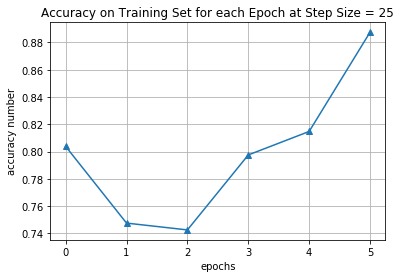

In [175]:
# visualization 
# ******IMPORTANT******: DO NOT run this cell if you didn't run the cell (the second cell above) that train the BERT model.
# To see the graph, you may also refer to the bert_accuracy.png in the original zipped folder
plt.grid()
plt.plot(history.history['accuracy'], marker = '^')
plt.xlabel("epochs")
plt.ylabel("accuracy number")
plt.title("Accuracy on Training Set for each Epoch at Step Size = 25")
plt.savefig('bert_accuracy.png')

Now as we finished the training task, let's go ahead and apply our model to some new instances!

In [19]:
# Quickly test a few predictions - MRPC is a paraphrasing task, let's see if our model learned the task
sentence_0 = "This research was consistent with his findings."
sentence_1 = "His findings were compatible with this research."
sentence_2 = "His findings were not compatible with this research."
sentence_3 = "This is purely a trouble maker"
inputs_1 = tokenizer.encode_plus(sentence_0, sentence_1, add_special_tokens=True, return_tensors='pt')
inputs_2 = tokenizer.encode_plus(sentence_0, sentence_2, add_special_tokens=True, return_tensors='pt')
inputs_3 = tokenizer.encode_plus(sentence_0, sentence_3, add_special_tokens=True, return_tensors='pt')

# use the model that we saved
pred_1 = model(**inputs_1)[0].argmax().item()
pred_2 = model(**inputs_2)[0].argmax().item()
pred_3 = model(**inputs_3)[0].argmax().item()

print("sentence_1 is", "a paraphrase" if pred_1 else "not a paraphrase", "of sentence_0")
print("sentence_2 is", "a paraphrase" if pred_2 else "not a paraphrase", "of sentence_0")
print("sentence_3 is", "a paraphrase" if pred_3 else "not a paraphrase", "of sentence_0")

sentence_1 is a paraphrase of sentence_0
sentence_2 is a paraphrase of sentence_0
sentence_3 is not a paraphrase of sentence_0


In [20]:
sentence_0 = "Practical data science is applied in many fields."
sentence_1 = "I like cooking at home with some guidance from cookbook."
sentence_2 = "Applied Data Science skill is important in various industries."
inputs_1 = tokenizer.encode_plus(sentence_0, sentence_1, add_special_tokens=True, return_tensors='pt')
inputs_2 = tokenizer.encode_plus(sentence_0, sentence_2, add_special_tokens=True, return_tensors='pt')


pred_1 = model(**inputs_1)[0].argmax().item()
pred_2 = model(**inputs_2)[0].argmax().item()

print("sentence_1 is", "a paraphrase" if pred_1 else "not a paraphrase", "of sentence_0")
print("sentence_2 is", "a paraphrase" if pred_2 else "not a paraphrase", "of sentence_0")


sentence_1 is not a paraphrase of sentence_0
sentence_2 is a paraphrase of sentence_0


# Summary
Now we have some hands on experience on training BERT and some steps closer to it. It is a hugh breakthrough in the NLP community since it first released last year. The fact that it is applicable in more than 100 languages and approachable will allow more practical applications in the future. Also because of it is semantic in nature, BERT is a huge breakthrough of technologies in the semantic analysis, which is the pain-point for lots of NLP tasks. 

# Appendix
![mlm](mlm.png)
**Comparisom of accuracy on mased language model vs traditional left-to-right model *(Google, 2018)***

![image.png](GLUE.png)

**BERT performance comparison on GLUE dataset *(Google, 2018)***

![squad](bert_implement.png)
**BERT implementation example of pretraining and fine-tuning *(Google, 2018)***

# Citations
1. Google Research: Jacob Devlin, Ming-Wei Chang, Kenton Lee, Kristina Toutanova. October 2018. BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding, from: https://arxiv.org/abs/1810.04805
2. BERT Open-source: https://github.com/google-research/bert
3. Huggingface Transformers: https://github.com/huggingface/transformers
4. Wilson L Taylor. 1953. Cloze procedure: A new tool for measuring readability. Journalism Bulletin, 30(4):415–433.
5. Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N Gomez, Lukasz Kaiser, and Illia Polosukhin. 2017. Attention is all you need. In Advances in Neural Information Pro- cessing Systems, pages 6000–6010.
6. Tensorflow: https://www.tensorflow.org/
7. PyTorch: https://pytorch.org/
8. Tensorflow dataset: https://medium.com/tensorflow/introducing-tensorflow-datasets-c7f01f7e19f3
9. GLUE/MRPC dataset: https://www.microsoft.com/en-us/download/details.aspx?id=52398

In [1]:
# END of this Tutorial